In [40]:
# Import the dependencies.
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
from config import geoapify_key
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime
import requests
#turn off warning messages
import warnings
warnings.filterwarnings("ignore")

import cartopy.crs as ccrs
import geoviews as gv # noqa

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
#change size to 1300+ later
lats = np.random.uniform(low=-90.000, high=90.000, size=300)
lngs = np.random.uniform(low=-180.000, high=180.000, size=300)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

189

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass    


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nome
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | zary
Processing Record 7 of Set 1 | mamlyutka
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | nizwa
Processing Record 10 of Set 1 | urumqi
Processing Record 11 of Set 1 | teahupoo
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | kidal
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | tabou
Processing Record 18 of Set 1 | pimentel
Processing Record 19 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | labuhan
Processing Record 22 of Set 1 | faanui
Processing Record 23 of Set 

Processing Record 37 of Set 4 | thompson
Processing Record 38 of Set 4 | alta floresta
Processing Record 39 of Set 4 | esmeraldas
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
#convert array of dictionaries to Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nome,64.5011,-165.4064,17.67,73,100,5.75,US,2023-01-01 01:28:57
1,Carnarvon,-24.8667,113.6333,74.62,60,1,23.09,AU,2023-01-01 01:28:57
2,New Norfolk,-42.7826,147.0587,80.92,38,30,5.01,AU,2023-01-01 01:28:57
3,Hermanus,-34.4187,19.2345,64.80,86,2,14.90,ZA,2023-01-01 01:28:58
4,Avarua,-21.2078,-159.7750,84.25,84,75,5.75,CK,2023-01-01 01:28:29
5,Zary,51.6421,15.1373,60.06,66,99,11.99,PL,2023-01-01 01:28:58
6,Mamlyutka,54.9375,68.5394,-4.47,99,79,5.99,KZ,2023-01-01 01:28:58
7,Bredasdorp,-34.5322,20.0403,64.08,90,9,9.84,ZA,2023-01-01 01:28:59
8,Nizwa,22.9333,57.5333,61.77,58,0,1.83,OM,2023-01-01 01:28:59
9,Urumqi,43.8010,87.6005,4.15,85,75,2.24,CN,2023-01-01 01:28:59


In [8]:
#reordering DF columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nome,US,2023-01-01 01:28:57,64.5011,-165.4064,17.67,73,100,5.75
1,Carnarvon,AU,2023-01-01 01:28:57,-24.8667,113.6333,74.62,60,1,23.09
2,New Norfolk,AU,2023-01-01 01:28:57,-42.7826,147.0587,80.92,38,30,5.01
3,Hermanus,ZA,2023-01-01 01:28:58,-34.4187,19.2345,64.80,86,2,14.90
4,Avarua,CK,2023-01-01 01:28:29,-21.2078,-159.7750,84.25,84,75,5.75
5,Zary,PL,2023-01-01 01:28:58,51.6421,15.1373,60.06,66,99,11.99
6,Mamlyutka,KZ,2023-01-01 01:28:58,54.9375,68.5394,-4.47,99,79,5.99
7,Bredasdorp,ZA,2023-01-01 01:28:59,-34.5322,20.0403,64.08,90,9,9.84
8,Nizwa,OM,2023-01-01 01:28:59,22.9333,57.5333,61.77,58,0,1.83
9,Urumqi,CN,2023-01-01 01:28:59,43.8010,87.6005,4.15,85,75,2.24


In [9]:
#creating an output CSV
output_data_file = 'weather_data/cities.csv'
#export city_data into CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

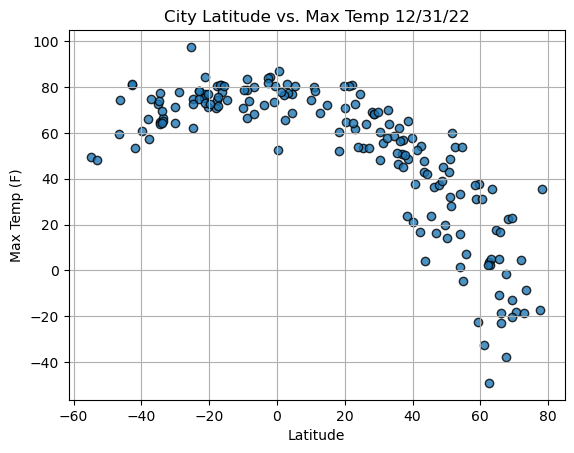

In [11]:
#import time
import time

#build scatter plot for lat vs. max temp
plt.scatter(lats, 
            max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temp "+ time.strftime('%x'))
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.grid(True)

#save figure
plt.savefig('weather_data/Fig1.png')

#show plot
plt.show()

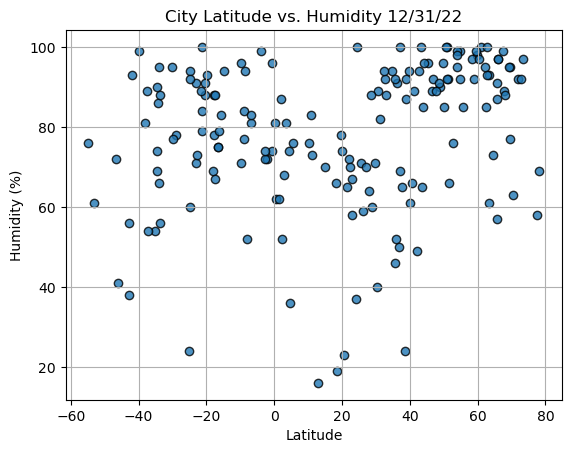

In [12]:
#import time
import time

#build scatter plot for lat vs. humidity
plt.scatter(lats, 
            humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save figure
plt.savefig('weather_data/Fig2.png')

#show plot
plt.show()

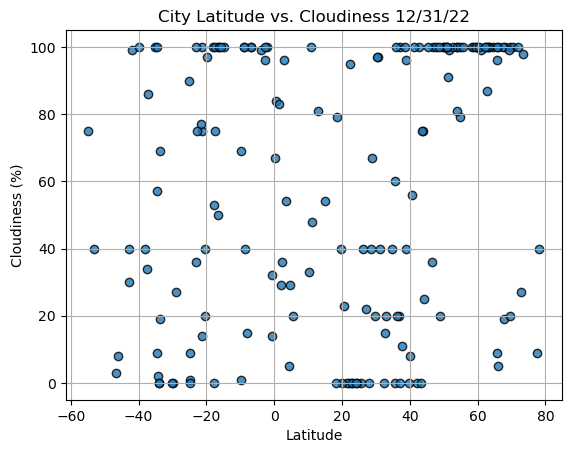

In [13]:
#import time
import time

#build scatter plot for lat vs. cloudiness
plt.scatter(lats, 
            cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save figure
plt.savefig('weather_data/Fig3.png')

#show plot
plt.show()

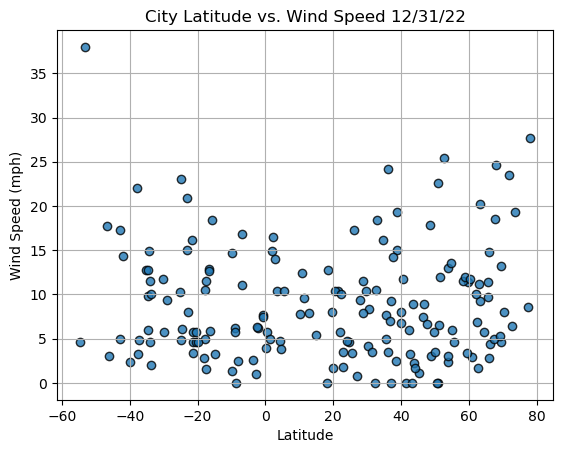

In [14]:
#import time
import time

#build scatter plot for lat vs. max temp
plt.scatter(lats, 
            wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#save figure
plt.savefig('weather_data/Fig4.png')

#show plot
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress
#create a function to create linear regression on the weather data and plot a regression line and the equation with data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line 'y values' from the slope and intercept
    regress_values = x_values * slope + intercept
    #get the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    #create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
#create northern & southern hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

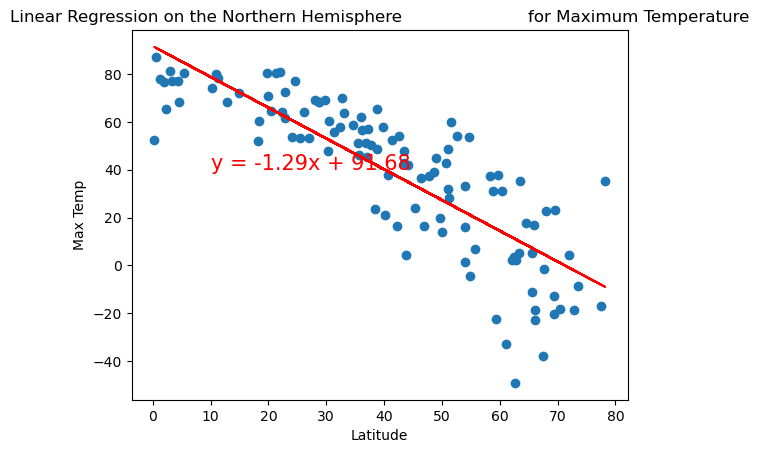

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,40))

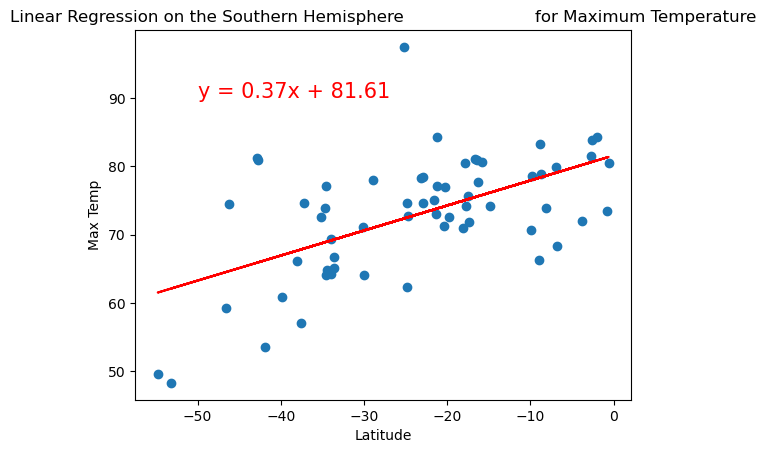

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

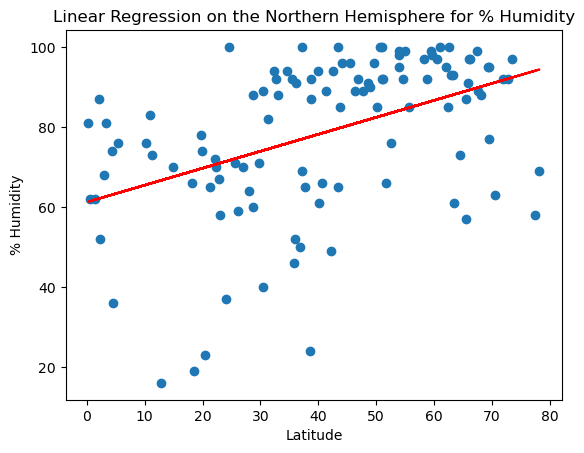

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

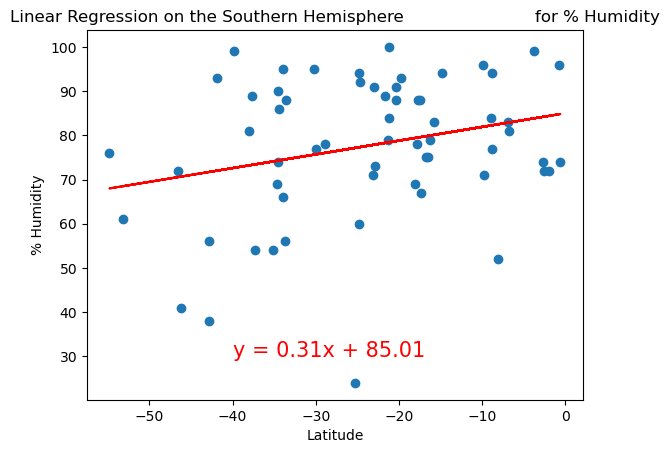

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-40,30))

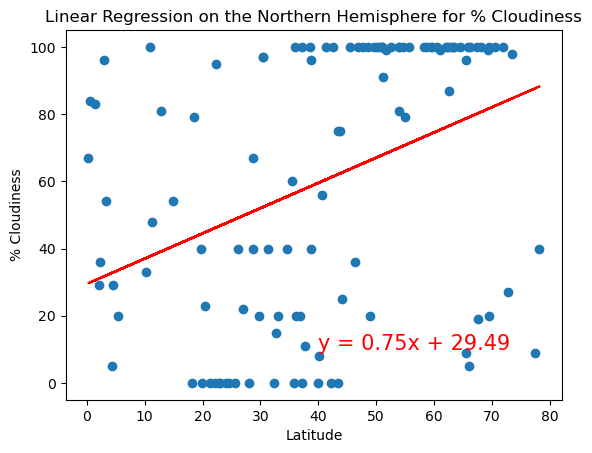

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

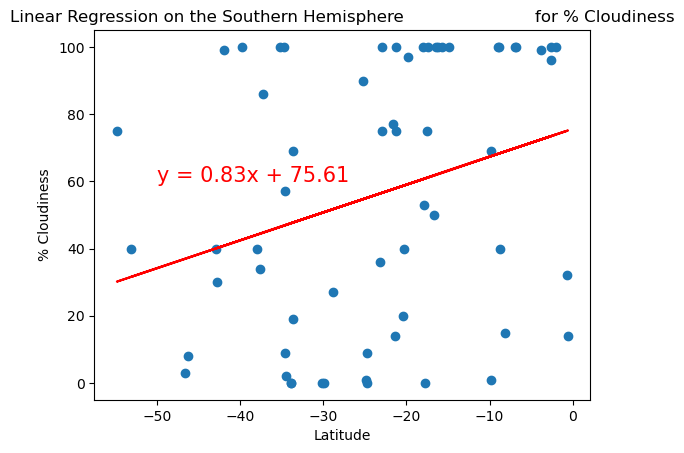

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

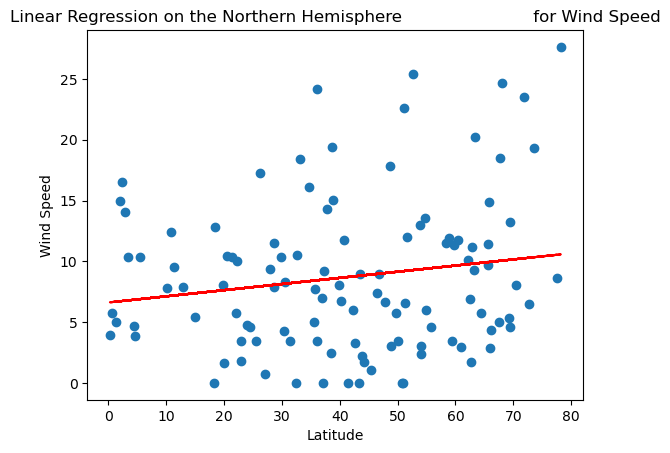

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(35,30))

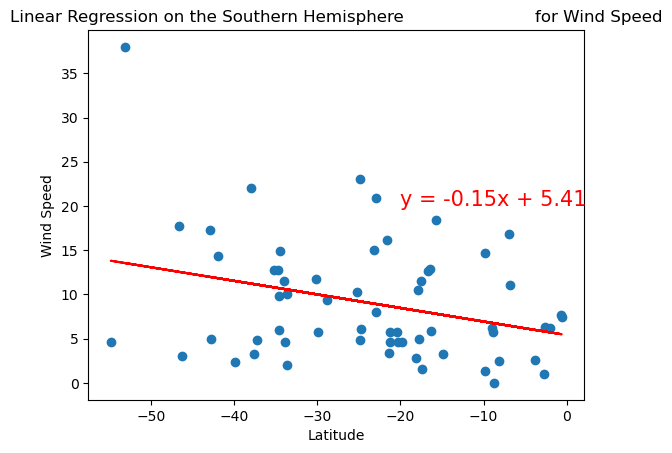

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-20,20))

In [25]:
#store the CSV you saved into a DF
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Nome,US,2023-01-01 01:28:57,64.5011,-165.4064,17.67,73,100,5.75
1,1,Carnarvon,AU,2023-01-01 01:28:57,-24.8667,113.6333,74.62,60,1,23.09
2,2,New Norfolk,AU,2023-01-01 01:28:57,-42.7826,147.0587,80.92,38,30,5.01
3,3,Hermanus,ZA,2023-01-01 01:28:58,-34.4187,19.2345,64.80,86,2,14.90
4,4,Avarua,CK,2023-01-01 01:28:29,-21.2078,-159.7750,84.25,84,75,5.75


In [26]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [27]:
#configure the map plot
map_plot_1 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
     geo = True,
     tiles = "OSM"
)

In [28]:
#display map_plot_1
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]

In [30]:
# Configure the map plot_2
map_plot_2 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500
)

# Display the map plot
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]

In [32]:
# Configure the map plot_3
map_plot_3 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "Max Temp",
    scale = 0.5,
    color = "City"
)

# Display the map plot
map_plot_3

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Max Temp)

In [34]:
# Configure the map plot_4
map_plot_4 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    size = "Wind Speed",
    scale = 0.5,
    color = "City"
)

# Display the map plot
map_plot_4

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Wind Speed)

In [35]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 50
What is the maximum temperature you would like for your trip? 85


In [36]:
preferred_cities_df = city_data_df.loc[
    (city_data_df["Max Temp"] <= max_temp) & (city_data_df["Max Temp"] >= min_temp)
]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Carnarvon,AU,2023-01-01 01:28:57,-24.8667,113.6333,74.62,60,1,23.09
2,2,New Norfolk,AU,2023-01-01 01:28:57,-42.7826,147.0587,80.92,38,30,5.01
3,3,Hermanus,ZA,2023-01-01 01:28:58,-34.4187,19.2345,64.80,86,2,14.90
4,4,Avarua,CK,2023-01-01 01:28:29,-21.2078,-159.7750,84.25,84,75,5.75
5,5,Zary,PL,2023-01-01 01:28:58,51.6421,15.1373,60.06,66,99,11.99
7,7,Bredasdorp,ZA,2023-01-01 01:28:59,-34.5322,20.0403,64.08,90,9,9.84
8,8,Nizwa,OM,2023-01-01 01:28:59,22.9333,57.5333,61.77,58,0,1.83
10,10,Teahupoo,PF,2023-01-01 01:29:00,-17.8333,-149.2667,80.56,78,53,10.54
11,11,Rikitea,PF,2023-01-01 01:29:00,-23.1203,-134.9692,78.30,71,36,15.01
12,12,Puerto Ayora,EC,2023-01-01 01:29:00,-0.7393,-90.3518,73.54,96,32,7.65


In [37]:
preferred_cities_df.count()

City_ID       110
City          110
Country       108
Date          110
Lat           110
Lng           110
Max Temp      110
Humidity      110
Cloudiness    110
Wind Speed    110
dtype: int64

In [38]:
preferred_cities_df.dropna()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Carnarvon,AU,2023-01-01 01:28:57,-24.8667,113.6333,74.62,60,1,23.09
2,2,New Norfolk,AU,2023-01-01 01:28:57,-42.7826,147.0587,80.92,38,30,5.01
3,3,Hermanus,ZA,2023-01-01 01:28:58,-34.4187,19.2345,64.80,86,2,14.90
4,4,Avarua,CK,2023-01-01 01:28:29,-21.2078,-159.7750,84.25,84,75,5.75
5,5,Zary,PL,2023-01-01 01:28:58,51.6421,15.1373,60.06,66,99,11.99
...,...,...,...,...,...,...,...,...,...,...
167,167,Port Elizabeth,ZA,2023-01-01 01:33:15,-33.9180,25.5701,64.31,95,0,4.61
168,168,Camacha,PT,2023-01-01 01:33:15,33.0833,-16.3333,63.82,88,20,18.41
169,169,Nishihara,JP,2023-01-01 01:33:16,26.1842,127.7558,64.06,59,40,17.27
171,171,Alta Floresta,BR,2023-01-01 01:33:17,-9.8756,-56.0861,70.63,96,69,1.32


In [39]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Carnarvon,AU,74.62,-24.8667,113.6333,
2,New Norfolk,AU,80.92,-42.7826,147.0587,
3,Hermanus,ZA,64.80,-34.4187,19.2345,
4,Avarua,CK,84.25,-21.2078,-159.7750,
5,Zary,PL,60.06,51.6421,15.1373,
7,Bredasdorp,ZA,64.08,-34.5322,20.0403,
8,Nizwa,OM,61.77,22.9333,57.5333,
10,Teahupoo,PF,80.56,-17.8333,-149.2667,
11,Rikitea,PF,78.30,-23.1203,-134.9692,
12,Puerto Ayora,EC,73.54,-0.7393,-90.3518,


In [41]:
# Set initial parameters to search for a hotel.
radius = 5000
params = {
    "categories":"accommodation.hotel",
    "apiKey": geoapify_key,
}

In [45]:
# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # Get latitude and longitude from DataFrame.
    latitude = row["Lat"]
    longitude = row["Lng"]

    # Add the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{longitude},{latitude},{radius}"

    # Set up the base URL for the Geoapify Places API.
    base_url = "https://api.geoapify.com/v2/places"

    # Make request and retrieve the JSON data by using the params dictionary
    name_address = requests.get(base_url, params=params)

    # Convert the API response to JSON format
    name_address = name_address.json()

    # Get the first hotel from the results and store the name
try:
    hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
except (KeyError, IndexError):
        #if no hotel is found set hotel name as no hotel found
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"

In [46]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Carnarvon,AU,74.62,-24.8667,113.6333,
2,New Norfolk,AU,80.92,-42.7826,147.0587,
3,Hermanus,ZA,64.80,-34.4187,19.2345,
4,Avarua,CK,84.25,-21.2078,-159.7750,
5,Zary,PL,60.06,51.6421,15.1373,
7,Bredasdorp,ZA,64.08,-34.5322,20.0403,
8,Nizwa,OM,61.77,22.9333,57.5333,
10,Teahupoo,PF,80.56,-17.8333,-149.2667,
11,Rikitea,PF,78.30,-23.1203,-134.9692,
12,Puerto Ayora,EC,73.54,-0.7393,-90.3518,
